##### In this project, they'll go through the sql query writing, data analysis process and data visualization process. This will enable them have an overview of the end to end process in data analysis
They will use the Python libraries NumPy, pandas, and Matplotlib, (and whichever they find most suitable for their use case). The aim is simple, use whatever they have at their disposal to get it done, provided it is within the context of python or sql. Depending on the task

Introduction

In this project, you will extract, clean and visualize the dataset from IBM employee attribution and the possible factors for employee attrition. Your task is seen below: 
Using the attr_data.db, extract all the data from the only table in the database using SQL. Once the data is extracted, import the data into Pandas and continue with the analysis. 
The following questions should be answered:

What do you think are the 3 factors behind employee attrition?
What is the relationship between Education and Monthly Income?
What is the effect of age on attrition?
Is Income the main factor in employee attrition?
How does work-life balance impact the overall attrition rate?

To submit, push your notebook to your GitHub repo, and share a link to your notebook.
What we would be looking out for:

Successful extraction of data from database
Right Execution of Codes
Code Structure
Output relationship to the question asked



In [45]:
# Import sqlite
import sqlite3

print ('sucessfully imported module')

sucessfully imported module


In [46]:
# create or connect to a database
conn = sqlite3.connect("attr_data.db")

# check that connection was successful
print ("Database connected successfully!"); print(type(conn))

Database connected successfully!
<class 'sqlite3.Connection'>


In [47]:
# create a cursor object for execution of sql queries
cursor = conn.cursor()

#check that curso is created successfully
print("Cursor created successfully \n", type(cursor))

Cursor created successfully 
 <class 'sqlite3.Cursor'>


In [48]:
# Import other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

%matplotlib inline

In [49]:
#Import dataset

df = attr_data = pd.read_csv('Desktop/attr.data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/attr.data.csv'

In [50]:
# Checking the table in the database

sql = """
SELECT name
FROM sqlite_schema
WHERE type = 'table';
"""
cursor.execute(sql)

#Output the query

result = cursor.fetchall()
result

[('attrition_records',), ('sqlite_sequence',)]

In [130]:
sql = """
SELECT *
FROM attrition_records
"""
cursor.execute(sql)

##Output the query
result = cursor.fetchall()
# result

In [39]:

# Execute the query
table = pd.read_sql(sql, conn)
table[1:]

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [58]:
table.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [63]:
# To determine table daata types 
table.dtypes

id                           int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

In [60]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [66]:
# To describe data for all columns
table.describe(include="all")

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,2,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [65]:
# To check for duplicated data
table.duplicated().sum()

0

In [68]:
cat_col = [col for col in table.columns if table[col].dtype == 'O']
num_col = [col for col in table.columns if table[col].dtype != 'O']

In [70]:
table[cat_col].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [71]:
table[num_col].head()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,2,49,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,4,33,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,5,27,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


In [73]:
#To get the count of employees that contributed to attrition (yes) and the employees that did not (no)
table['Attrition'].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

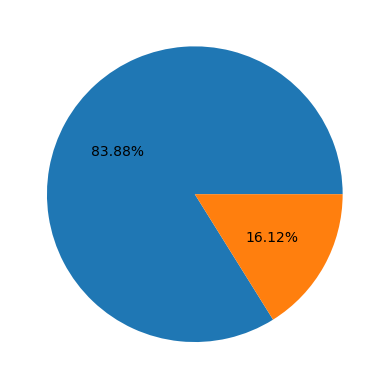

In [83]:
freq = table.Attrition.value_counts(normalize=True)
Attrition = table.Attrition.unique()
plt.pie(freq, autopct='%.2f%%');

In [78]:
#Print all of the object data types and their unique values
for column in table.columns:
    if table[column].dtype == object:
        print(str(column) + ' : ' + str(table[column].unique()))
        print(table[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

In [86]:
#calculate the percentage of performance rating per category in the whole dataset
round(table['Attrition'].value_counts()/table.shape[0] * 100,2)

No     83.88
Yes    16.12
Name: Attrition, dtype: float64

In [90]:
# data_correlation = table.corr("pearson")
data_correlation = table.corr()

In [91]:
data_correlation['Attrition'].sort_values(ascending=True)

KeyError: 'Attrition'

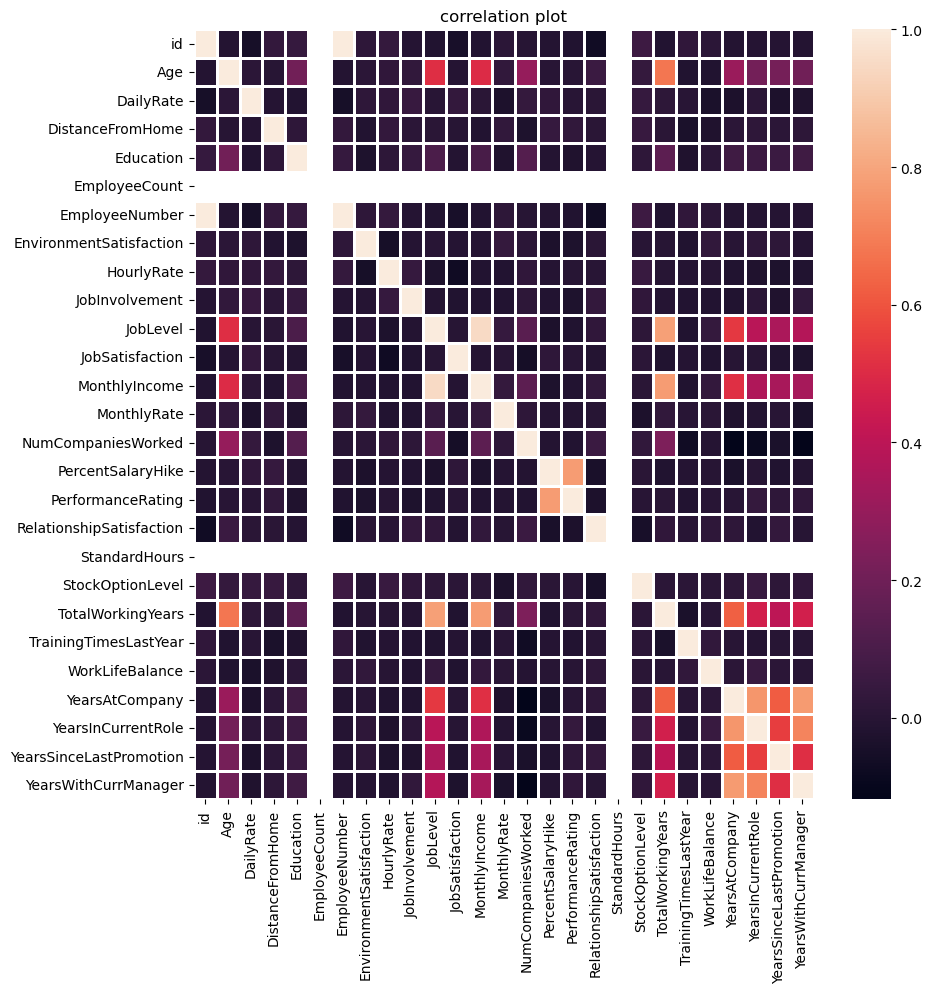

In [92]:
corr = table.corr()
plt.figure(figsize = (10,10))
plt.title('correlation plot')
sns.heatmap(corr, linewidth = 1);

In [94]:
#Dropping cpolums that have no effect
#Drop the column EmployeeNumber
table = table.drop('EmployeeNumber', axis = 1)
#DRop the column StandardHours
table = table.drop('StandardHours', axis = 1) 
#Drop the column EmployeeCount
table = table.drop('EmployeeCount', axis = 1) 
#Drop the column EmployeeCount
table = table.drop('Over18', axis = 1) 

<AxesSubplot:>

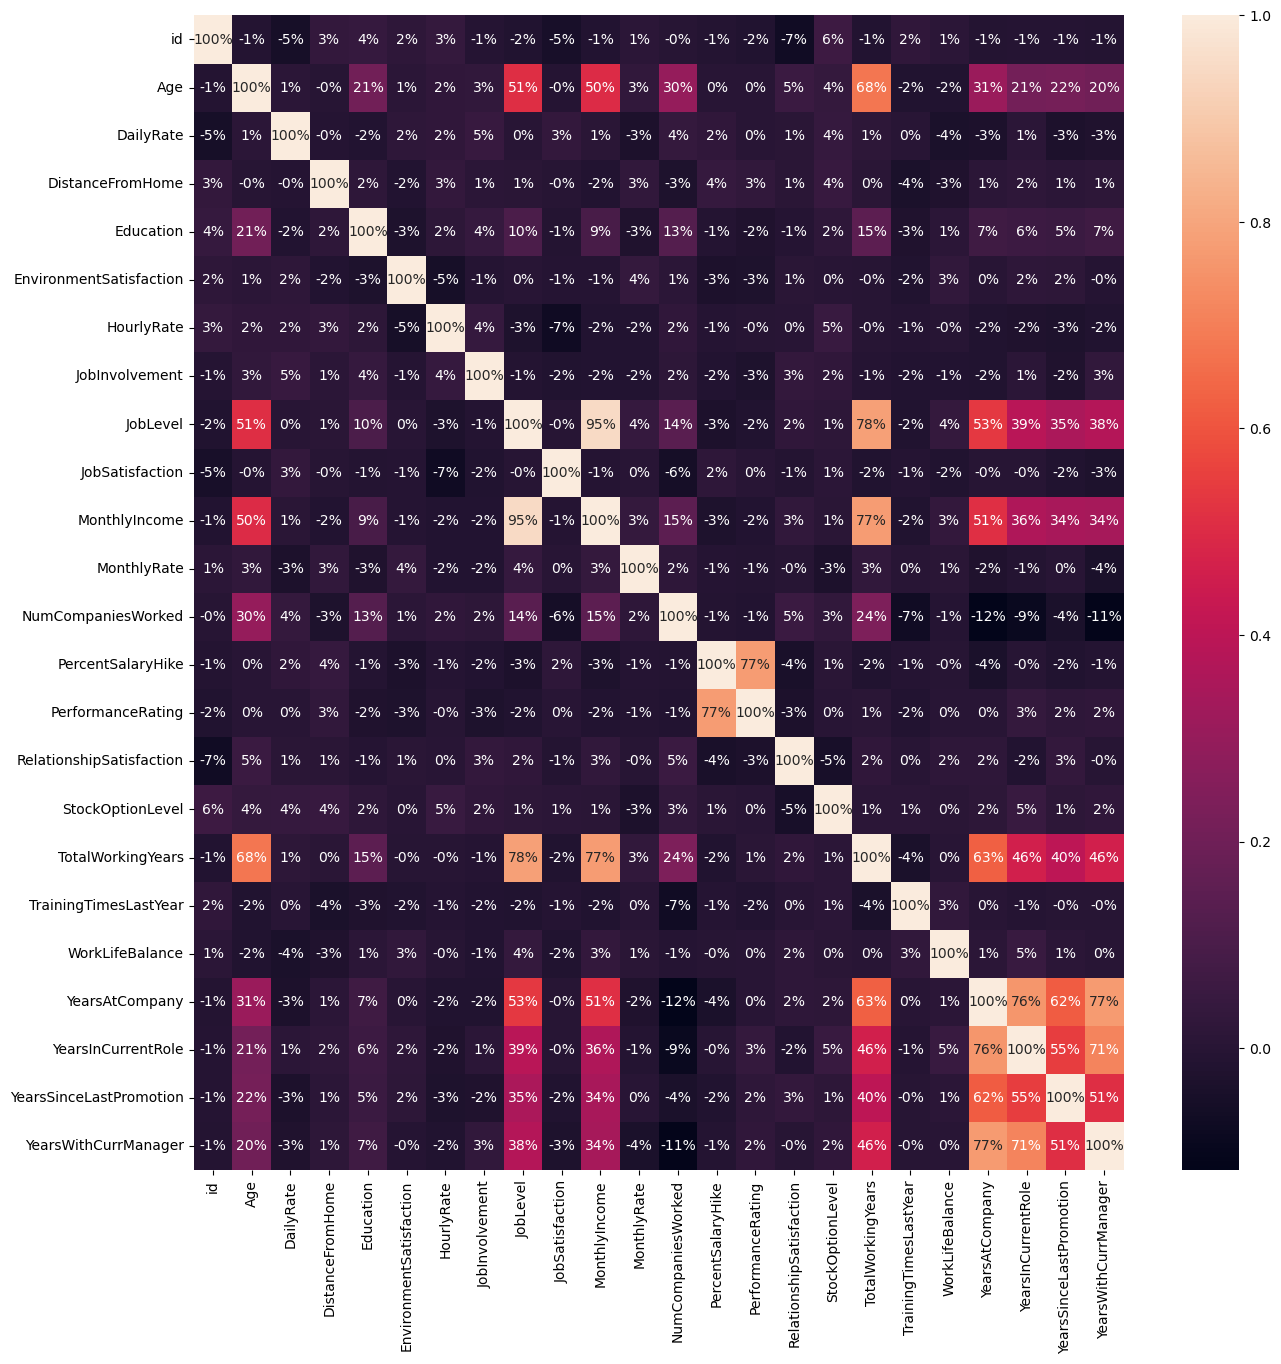

In [98]:
#Visualize the correlation
plt.figure(figsize=(15,15))
sns.heatmap(table.corr(), annot=True, fmt='.0%')

### 1. What are the 3 factors behind employee attrition?

In [100]:
table.groupby('Gender').Attrition.mean()

TypeError: Could not convert YesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo to numeric

In [101]:
#To transform the non-numeric columns into numerical columns

from sklearn.preprocessing import LabelEncoder
for column in table.columns:
        if table[column].dtype == np.number:
            continue
        table[column] = LabelEncoder().fit_transform(table[column])

/var/folders/1c/67_sq4554pgd469dtzsgc1x80000gn/T/ipykernel_4645/3731428967.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if table[column].dtype == np.number:


In [102]:
table.groupby('Gender').Attrition.mean()

Gender
0    0.147959
1    0.170068
Name: Attrition, dtype: float64

In [103]:
table.Gender.value_counts()

1    882
0    588
Name: Gender, dtype: int64

##### There is a higher attrition rate for males as compared to females

In [104]:
table.groupby('MaritalStatus').Attrition.mean()

MaritalStatus
0    0.100917
1    0.124814
2    0.255319
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='MaritalStatus'>

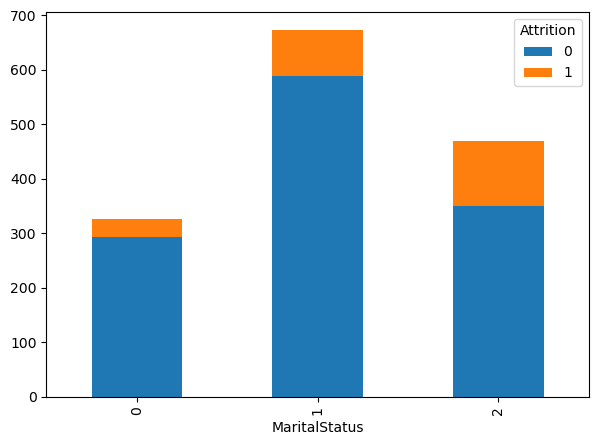

In [105]:
table.groupby(['MaritalStatus', 'Attrition']).size().unstack().plot(kind='bar',
                                                                                stacked=True,
                                                                               figsize=(7, 5))

#### The bar chart above shows us that attrition rate is higher among single employees

In [106]:
table.groupby('Department').Attrition.mean()

Department
0    0.190476
1    0.138398
2    0.206278
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='Department'>

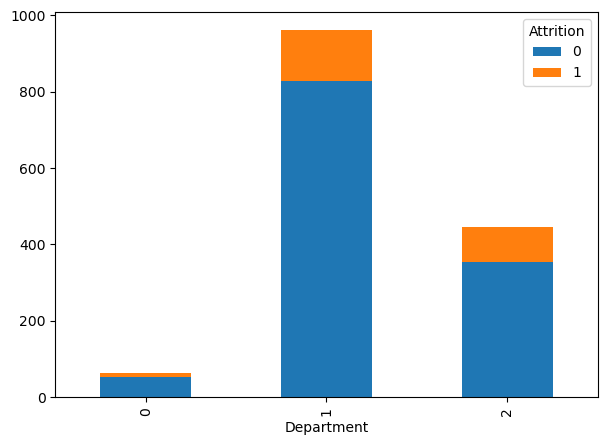

In [108]:
table.groupby(['Department', 'Attrition']).size().unstack().plot(kind='bar',
                                                                                stacked=True,
                                                                               figsize=(7, 5))

### 2. What is the relasionship between Education & Monthly Income?

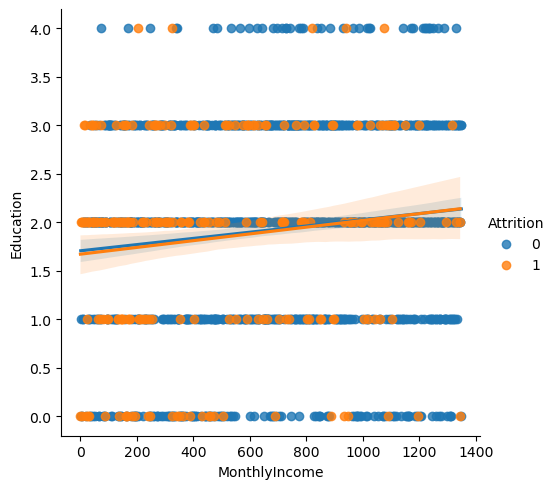

In [110]:
sns.lmplot(x = 'MonthlyIncome', y = 'Education', hue = 'Attrition', data= table) 

<AxesSubplot:ylabel='Education'>

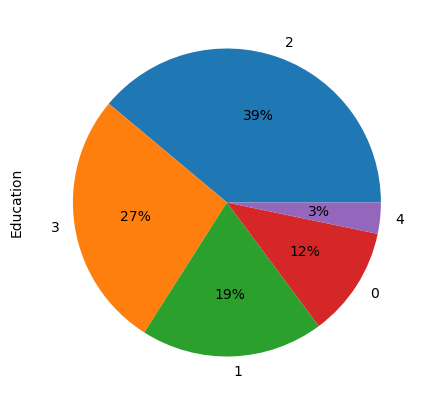

In [111]:
table.Education.value_counts().plot(kind='pie',
                                 autopct='%1.0f%%',
                                 figsize=(7, 5))

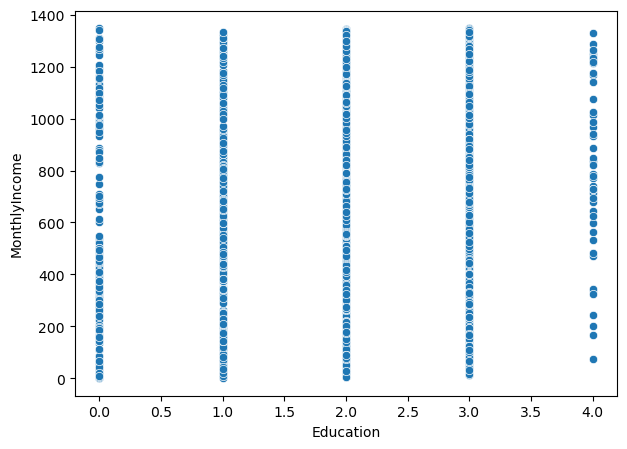

In [112]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=table, y='MonthlyIncome', x='Education');

#### Education and Monthly income have a very weak correlation, as seen from the heaatmap above.

### 3. What is the effect of age on attrition?

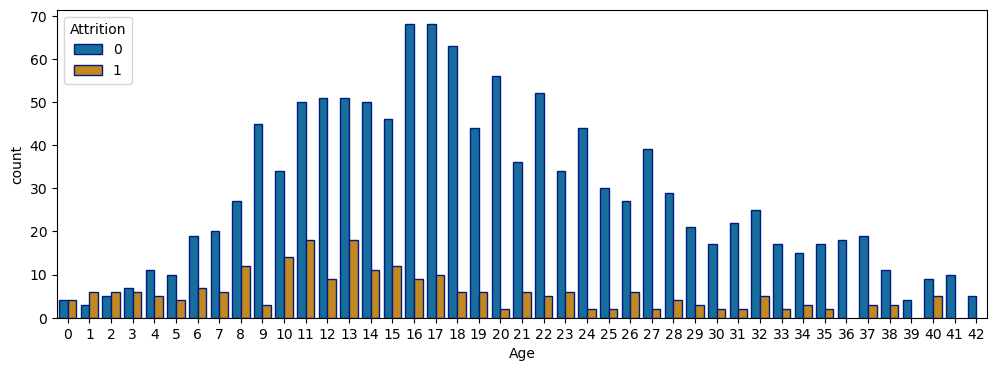

In [117]:
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='Age', hue='Attrition', data = table, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

<AxesSubplot:xlabel='Age'>

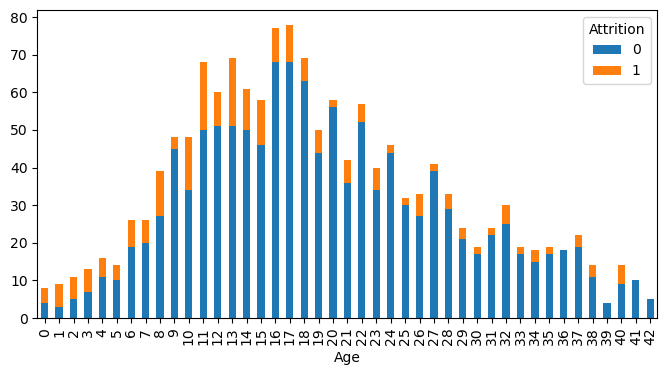

In [118]:
table.groupby(['Age','Attrition']).size().unstack().plot(kind='bar',
                                                        stacked=True,
                                                                    figsize=(8, 4))

#### Attrition rate is less frequent in the more elderly employees.

### 4. Is income the main factor in employee attrition?

In [120]:
table[['MonthlyIncome', 'Attrition',]].groupby(["Attrition"]).describe()

MonthlyIncome                                                     \
                  count        mean         std  min    25%    50%     75%   
Attrition                                                                    
0                1233.0  688.451744  381.086024  1.0  365.0  692.0  1011.0   
1                 237.0  481.147679  382.589503  0.0  156.0  362.0   801.0   

                   
              max  
Attrition          
0          1348.0  
1          1344.0

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

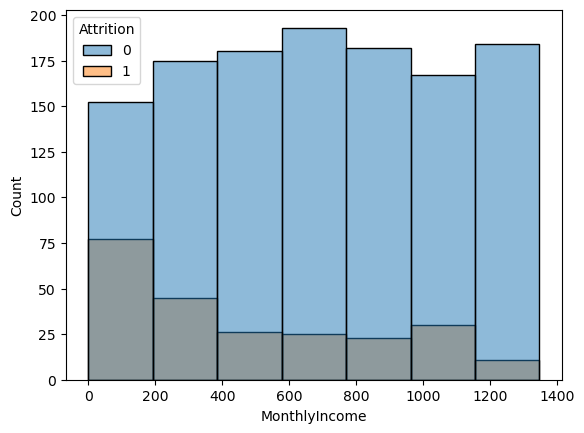

In [121]:
sns.histplot(data = table, x = "MonthlyIncome", hue = "Attrition", bins = 7)

#### Employees with lower Monthly income have a higher attrition rate

### 5. How does work-life balance impact the overall attrition rate?

In [124]:
table.WorkLifeBalance.value_counts()

2    893
1    344
3    153
0     80
Name: WorkLifeBalance, dtype: int64

In [125]:
round(table.WorkLifeBalance.value_counts()/table.shape[0] * 100,2 )


2    60.75
1    23.40
3    10.41
0     5.44
Name: WorkLifeBalance, dtype: float64

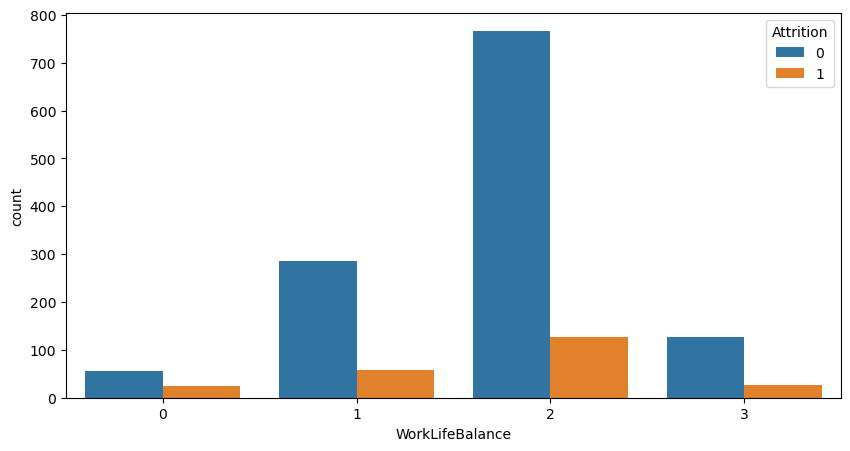

In [126]:
fig, (ax1) = plt.subplots(1, figsize=(10,5))
ax = sns.countplot(x= "WorkLifeBalance", hue = "Attrition", data=table, ax=ax1)


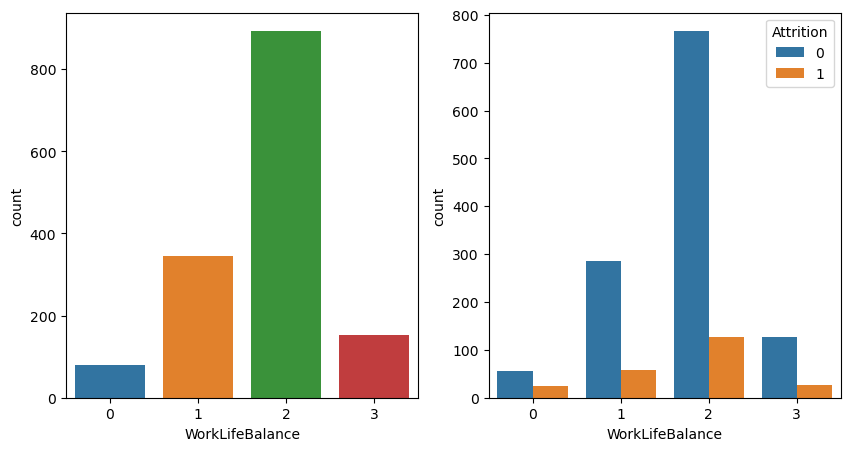

In [127]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(x= "WorkLifeBalance", data=table, ax=ax1)
ax = sns.countplot(x= "WorkLifeBalance", hue = "Attrition", data=table, ax=ax2)

#### Most employees have good worklife balance, while a few have poor worklife balance, the employees with poor worklife balance have a higher attrition rate.